In [2]:
import pandas as pd

# Load the first Excel file
Sheet1 = 'Data'
excel_file1 = 'dataVKR.xlsx'
df1 = pd.read_excel(excel_file1, sheet_name=Sheet1)
dates1 = df1['Date']

# Load the second Excel file
excel_file2 = 'orig2.xlsx'
df2 = pd.read_excel(excel_file2)
dates2 = df2['Date']

In [1]:
import os
os.chdir('C:/Users/user/Downloads')

# India

In [ ]:
dates2

In [ ]:
# Count the number of days for each year in both files
yearly_counts1 = dates1.dt.year.value_counts()
yearly_counts2 = dates2.dt.year.value_counts()

In [ ]:
# Compare the yearly counts between the two files
comparison = pd.DataFrame({
    'File1': yearly_counts1,
    'File2': yearly_counts2
}).fillna(0).astype(int)

comparison['Difference'] = comparison['File1'] - comparison['File2']

print(comparison)

In [ ]:
# Calculate the net decrease of days
net_decrease = abs(comparison['Difference'].sum())

print(f"The net decrease of days between the two files is: {net_decrease}")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select the columns you want to analyze (columns 3 to 26)
columns_to_check = df2.columns[1:14]
columns_to_check

Index(['India_8', 'India_36', 'India_40', 'India_67', 'India_69', 'India_124',
       'India_136', 'India_153', 'India_160', 'India_172', 'India_199',
       'India_206', 'India_220'],
      dtype='object')

In [5]:
# Check for missing values
missing_values = df2[columns_to_check].isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
India_8      0
India_36     0
India_40     0
India_67     0
India_69     0
India_124    0
India_136    0
India_153    0
India_160    0
India_172    0
India_199    0
India_206    0
India_220    0
dtype: int64


In [6]:
# Calculate the total sample size
total_sample_size = df2.shape[0]

for col in columns_to_check:
    # Check for outliers using the IQR method
    q1 = df2[col].quantile(0.25)
    q3 = df2[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)][col]
    num_outliers = len(outliers)
    
    # Calculate the percentage of outliers
    outlier_percentage = (num_outliers / total_sample_size) * 100
    
    print(f"Outliers in column '{col}': {num_outliers} ({outlier_percentage:.2f}% of total sample size)")
    
    # Check if the number of outliers is acceptable
    if outlier_percentage < 10:
        print("The number of outliers is acceptable.")
    else:
        print("The number of outliers may be too high and requires further investigation.")

Outliers in column 'India_8': 121 (3.30% of total sample size)
The number of outliers is acceptable.
Outliers in column 'India_36': 305 (8.32% of total sample size)
The number of outliers is acceptable.
Outliers in column 'India_40': 149 (4.07% of total sample size)
The number of outliers is acceptable.
Outliers in column 'India_67': 107 (2.92% of total sample size)
The number of outliers is acceptable.
Outliers in column 'India_69': 106 (2.89% of total sample size)
The number of outliers is acceptable.
Outliers in column 'India_124': 49 (1.34% of total sample size)
The number of outliers is acceptable.
Outliers in column 'India_136': 75 (2.05% of total sample size)
The number of outliers is acceptable.
Outliers in column 'India_153': 101 (2.76% of total sample size)
The number of outliers is acceptable.
Outliers in column 'India_160': 119 (3.25% of total sample size)
The number of outliers is acceptable.
Outliers in column 'India_172': 235 (6.41% of total sample size)
The number of ou

In [ ]:
# Check data types of the columns
print(df2.dtypes)

In [ ]:
import matplotlib.pyplot as plt

for col in columns_to_check:
    # Plot a histogram to visualize the distribution
    plt.figure()
    df2[col].hist()
    plt.title(f"Distribution of values in column '{col}'")
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select the CDS spread columns (columns 3 to 26)
cds_columns = df2.columns[1:14]

In [ ]:
import pandas as pd

# Create a summary DataFrame
cds_stats = df2[cds_columns].describe().T

# Convert the DataFrame to a HTML table
html_table = cds_stats.to_html(classes='table table-striped')

# Display the HTML table
from IPython.display import display, HTML
display(HTML(html_table))

In [ ]:
import pandas as pd

# Create a summary DataFrame
cds_stats = df2[cds_columns].describe().T

# Export the DataFrame to an Excel file
cds_stats.to_excel('cds_stats_india.xlsx', index=True)

In [ ]:
from IPython.display import display
display(cds_stats)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Select the CDS spread columns (columns 3 to 26)
cds_columns = df2.columns[1:14]

# Create the Plotly line plot
fig = go.Figure()
for col in cds_columns:
    fig.add_trace(go.Scatter(x=df2.index, y=df2[col], mode='lines', name=col))

fig.update_layout(
    title='CDS Spread Trends Over Time',
    xaxis_title='Time',
    yaxis_title='CDS Spread',
    legend_title='CDS Spread Columns',
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Select the CDS spread columns (columns 3 to 26)
cds_columns = df2.columns[1:14]

# Create the Plotly histograms
fig = go.Figure()
for col in cds_columns:
    fig.add_trace(go.Histogram(x=df2[col], nbinsx=20, histnorm='probability density', name=col))

fig.update_layout(
    title='Distribution of CDS Spreads',
    xaxis_title='CDS Spread',
    yaxis_title='Probability Density',
    bargap=0.1,
    bargroupgap=0.1,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

fig.show()

In [3]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

In [4]:
# Select the CDS spread columns (columns 2 to 14)
cds_columns = df2.columns[1:14]

In [5]:
start_dates = {}
end_dates = {}
unchanged_series = []
unchanged_threshold = 30

In [6]:
for col in cds_columns:
    cds_spread = df2[col]

    # Find the start date
    for i, value in enumerate(cds_spread):
        if value != 0:
            start_dates[col] = cds_spread.index[i]
            break

    # Check if the last `unchanged_threshold` values are the same
    last_values = cds_spread.iloc[-unchanged_threshold:]
    if len(set(last_values)) == 1:
        unchanged_series.append(col)

        # Find the end date (index when the series took the last unique value)
        last_unique_value = cds_spread.iloc[-1]
        for i in range(len(cds_spread) - 1, -1, -1):
            if cds_spread.iloc[i] != last_unique_value:
                end_dates[col] = cds_spread.index[i + 1]
                break
        else:
            end_dates[col] = cds_spread.index[0]


In [7]:
unchanged_series

['India_8',
 'India_36',
 'India_69',
 'India_124',
 'India_160',
 'India_206',
 'India_220']

In [8]:
print("Time series that did not change in the last", unchanged_threshold, "periods:")
for series in unchanged_series:
    print(f"{series}: Start date - {start_dates[series]}, End date - {end_dates[series]}")

Time series that did not change in the last 30 periods:
India_8: Start date - 0, End date - 3610
India_36: Start date - 0, End date - 3504
India_69: Start date - 0, End date - 3593
India_124: Start date - 0, End date - 3502
India_160: Start date - 0, End date - 3502
India_206: Start date - 0, End date - 3075
India_220: Start date - 0, End date - 3504


In [9]:
start_dates

{'India_8': 0,
 'India_36': 0,
 'India_40': 0,
 'India_67': 0,
 'India_69': 0,
 'India_124': 0,
 'India_136': 0,
 'India_153': 0,
 'India_160': 0,
 'India_172': 315,
 'India_199': 1242,
 'India_206': 0,
 'India_220': 0}

In [10]:
end_dates

{'India_8': 3610,
 'India_36': 3504,
 'India_69': 3593,
 'India_124': 3502,
 'India_160': 3502,
 'India_206': 3075,
 'India_220': 3504}

In [ ]:
chosen_lags = {}

for col in cds_columns:
    cds_spread = df2[col][start_dates[col]:]
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_pacf(cds_spread, ax=ax, lags=20, method = "ols-adjusted")  # Change lags as needed
    ax.set_title(f"Partial Autocorrelation Function (PACF) for {col}")
    plt.show()
    
    #Choose the appropriate lag for the current column
    lag_value = int(input(f"Enter the chosen lag value for {col}: "))
    chosen_lags[col] = lag_value

In [11]:
# Чтобы не мучиться

chosen_lags = {'India_8': 3, 'India_36': 3, 'India_40': 5, 'India_67': 4, 'India_69': 4, 'India_124': 3, 'India_136': 3, 'India_153': 6, 'India_160': 3, 'India_172': 4, 'India_199': 6, 'India_206': 3, 'India_220': 3}

In [12]:
import pandas as pd
from arch.unitroot import KPSS

# Perform KPSS test for each CDS spread column
stationary_count = 0
total_columns = len(cds_columns)

# Create an empty dictionary to store the corrected series
corrected_series = {}

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df2[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df2[col][start_dates[col]:]
    # Store the corrected series in the dictionary
    corrected_series[col] = cds_spread
    lag_value = chosen_lags[col]
    kpss = KPSS(cds_spread, lags=lag_value)
    print(f"Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for '{col}':") 
    print(kpss.summary().as_text())
    if kpss.pvalue > 0.05:
        stationary_count += 1
    
stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'India_8':
    KPSS Stationarity Test Results   
Test Statistic                 48.518
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'India_36':
    KPSS Stationarity Test Results   
Test Statistic                  9.888
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'India_40':
    KPSS Stationarity Test Results   
Test Statistic                 37.450
P-value

In [ ]:
corrected_series

In [ ]:
# Create a new DataFrame from the corrected series dictionary
corrected_df = pd.DataFrame(corrected_series)

# Export the corrected DataFrame to an Excel file
corrected_df.to_excel('corrected_series_India.xlsx', index=True)

In [13]:
# Вручную подобранные лаги

from arch.unitroot import ADF

stationary_count = 0
total_columns = len(cds_columns)

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df2[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df2[col][start_dates[col]:]

    lag_value = chosen_lags[col]
    adf = ADF(cds_spread, lags=lag_value)
    print(f"Augmented Dickey-Fuller (ADF) test for '{col}':") 
    print(adf.summary().as_text())
    if adf.pvalue <= 0.05:
        stationary_count += 1

stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

Augmented Dickey-Fuller (ADF) test for 'India_8':
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.118
P-value                         0.237
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Augmented Dickey-Fuller (ADF) test for 'India_36':
   Augmented Dickey-Fuller Results   
Test Statistic                 -3.009
P-value                         0.034
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Augmented Dickey-Fuller (ADF) test for 'India_40':
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.922
P-value                         0.

In [ ]:
# Автоматические подобранные лаги (для сравнения)

from arch.unitroot import ADF

stationary_count = 0
total_columns = len(cds_columns)

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df2[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df2[col][start_dates[col]:]
    adf = ADF(cds_spread)
    if adf.pvalue <= 0.05:
        stationary_count += 1
    print(adf.lags)

stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

In [16]:
import pandas as pd
from arch.unitroot import PhillipsPerron

# Perform KPSS test for each CDS spread column
stationary_count = 0
total_columns = len(cds_columns)

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df2[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df2[col][start_dates[col]:]
    lag_value = chosen_lags[col]
    pp = PhillipsPerron(cds_spread, lags=lag_value)
    print(f"Phillips-Perron (PP) test for '{col}':") 
    print(pp.summary().as_text())
    if pp.pvalue <= 0.05:
        stationary_count += 1
    
stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

Phillips-Perron (PP) test for 'India_8':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.824
P-value                         0.369
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Phillips-Perron (PP) test for 'India_36':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.807
P-value                         0.057
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Phillips-Perron (PP) test for 'India_40':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.565
P-value                         0.501
Lags                   

In [15]:
import pandas as pd
from arch.unitroot import ZivotAndrews

# Perform ZivotAndrews test for each CDS spread column
stationary_count = 0
total_columns = len(cds_columns)

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df2[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df2[col][start_dates[col]:]
    lag_value = chosen_lags[col]
    za = ZivotAndrews(cds_spread, lags=lag_value)
    print(f"Zivot-Andrews test for '{col}':") 
    print(za.summary().as_text())
    if za.pvalue <= 0.05:
        stationary_count += 1
    
stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

Zivot-Andrews test for 'India_8':
        Zivot-Andrews Results        
Test Statistic                 -4.015
P-value                         0.343
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.
Zivot-Andrews test for 'India_36':
        Zivot-Andrews Results        
Test Statistic                 -3.763
P-value                         0.505
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.
Zivot-Andrews test for 'India_40':
        Zivot-Andrews Results        
Test Statistic                 -4.496
P-

In [1]:
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import docx

# Load the Excel file
Sheet1 = 'Sheet1'
excel_file1 = 'corrected_series_India.xlsx'
df = pd.read_excel(excel_file1, sheet_name=Sheet1)

In [2]:
# Чтобы не мучиться

chosen_lags = {'India_8': 3, 'India_36': 3, 'India_40': 5, 'India_67': 4, 'India_69': 4, 'India_124': 3, 'India_136': 3, 'India_153': 6, 'India_160': 3, 'India_172': 4, 'India_199': 6, 'India_206': 3, 'India_220': 3}


Evaluating column: India_8
India_8 ARIMA(0,1,0) Metrics:
RMSE: 3.4065, MAE: 0.9115, MAPE: 0.7089
India_8 ARIMA(3,1,0) Metrics:
RMSE: 3.2876, MAE: 0.9356, MAPE: 0.7339
Better model for India_8: ARIMA(0,1,0)


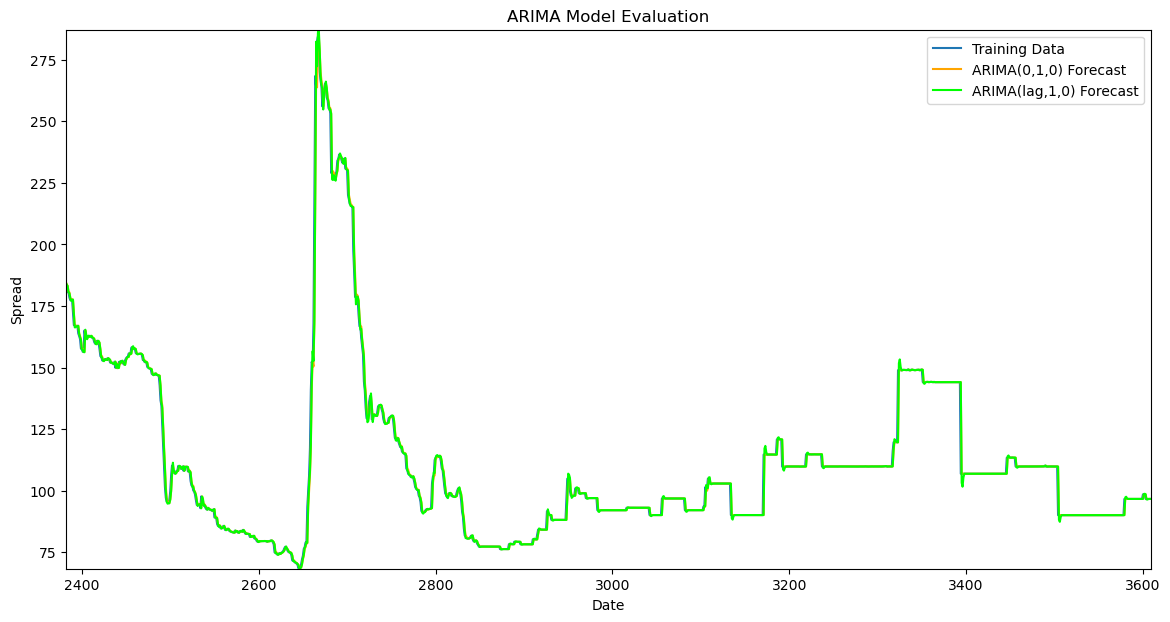


Evaluating column: India_36
India_36 ARIMA(0,1,0) Metrics:
RMSE: 6.0377, MAE: 2.5055, MAPE: 1.1624
India_36 ARIMA(3,1,0) Metrics:
RMSE: 6.0315, MAE: 2.5338, MAPE: 1.1772
Better model for India_36: ARIMA(0,1,0)


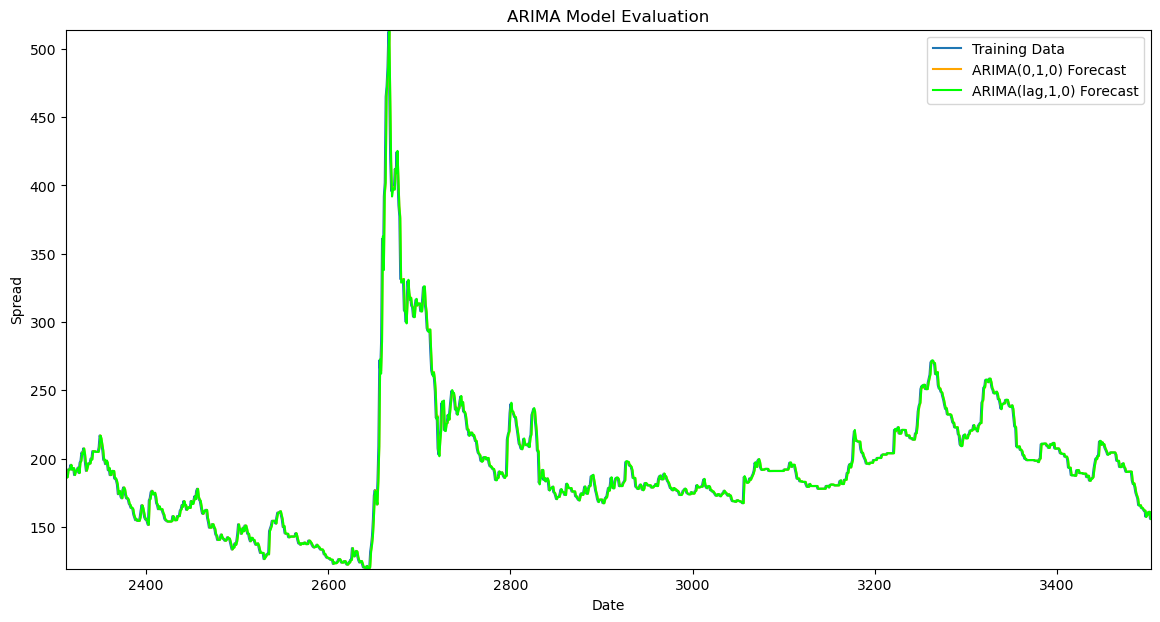


Evaluating column: India_40
India_40 ARIMA(0,1,0) Metrics:
RMSE: 3.1783, MAE: 1.0515, MAPE: 1.0351
India_40 ARIMA(5,1,0) Metrics:
RMSE: 3.0404, MAE: 1.1285, MAPE: 1.1228
Better model for India_40: ARIMA(0,1,0)


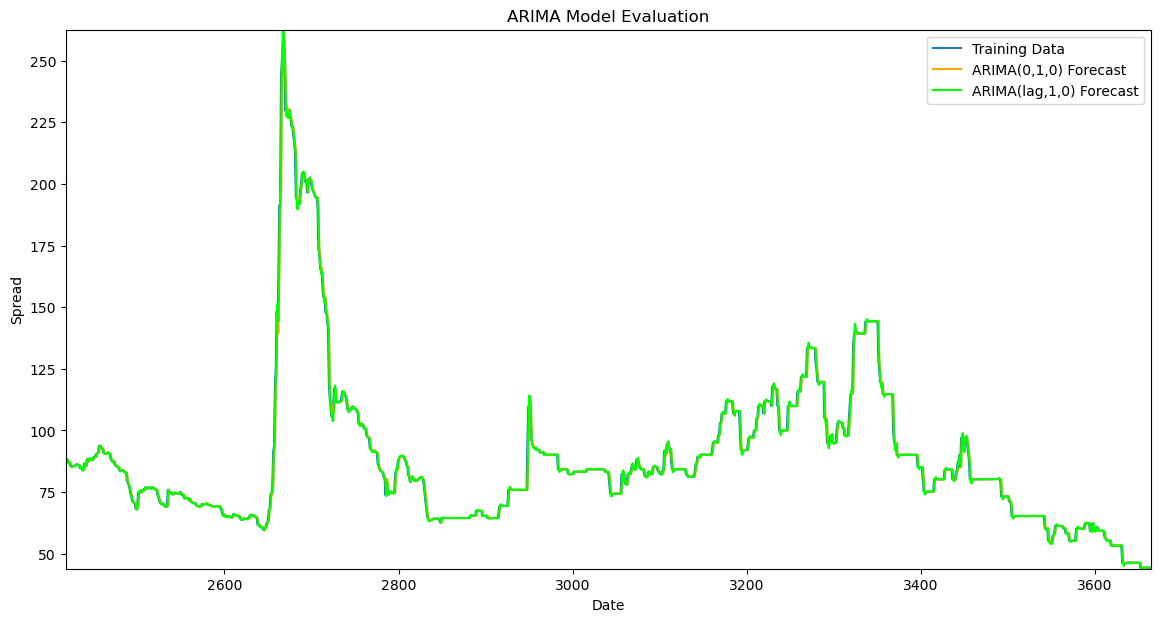


Evaluating column: India_67
India_67 ARIMA(0,1,0) Metrics:
RMSE: 4.0946, MAE: 1.0991, MAPE: 0.9148
India_67 ARIMA(4,1,0) Metrics:
RMSE: 4.0594, MAE: 1.2196, MAPE: 1.0212
Better model for India_67: ARIMA(0,1,0)


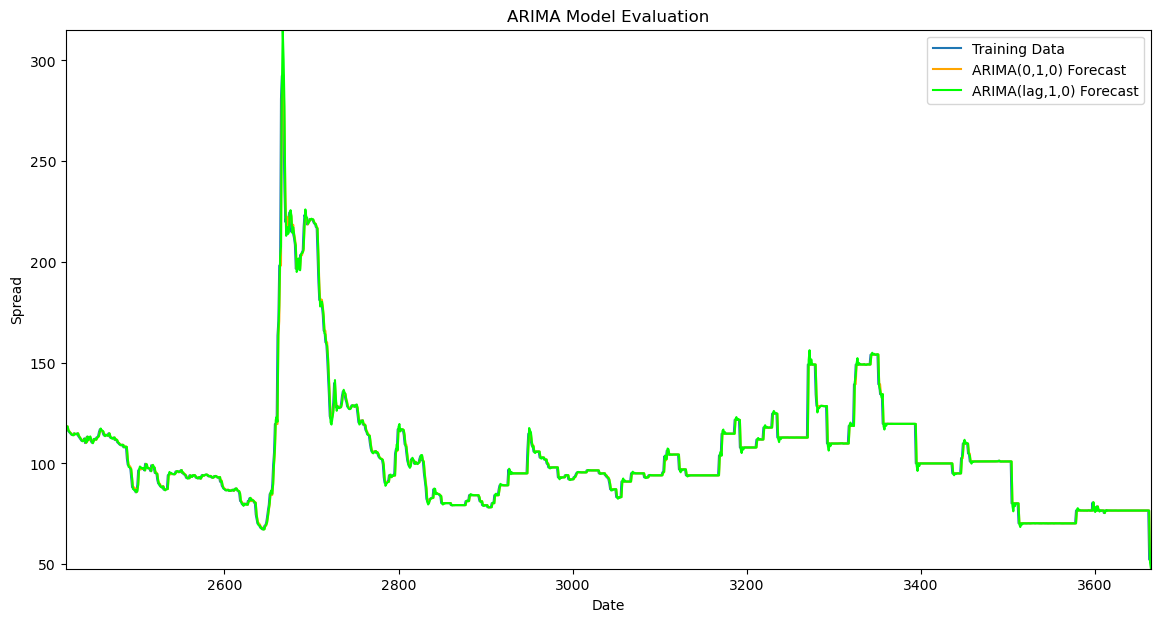


Evaluating column: India_69
India_69 ARIMA(0,1,0) Metrics:
RMSE: 4.4244, MAE: 1.6406, MAPE: 1.4377
India_69 ARIMA(4,1,0) Metrics:
RMSE: 4.3615, MAE: 1.7238, MAPE: 1.5039
Better model for India_69: ARIMA(0,1,0)


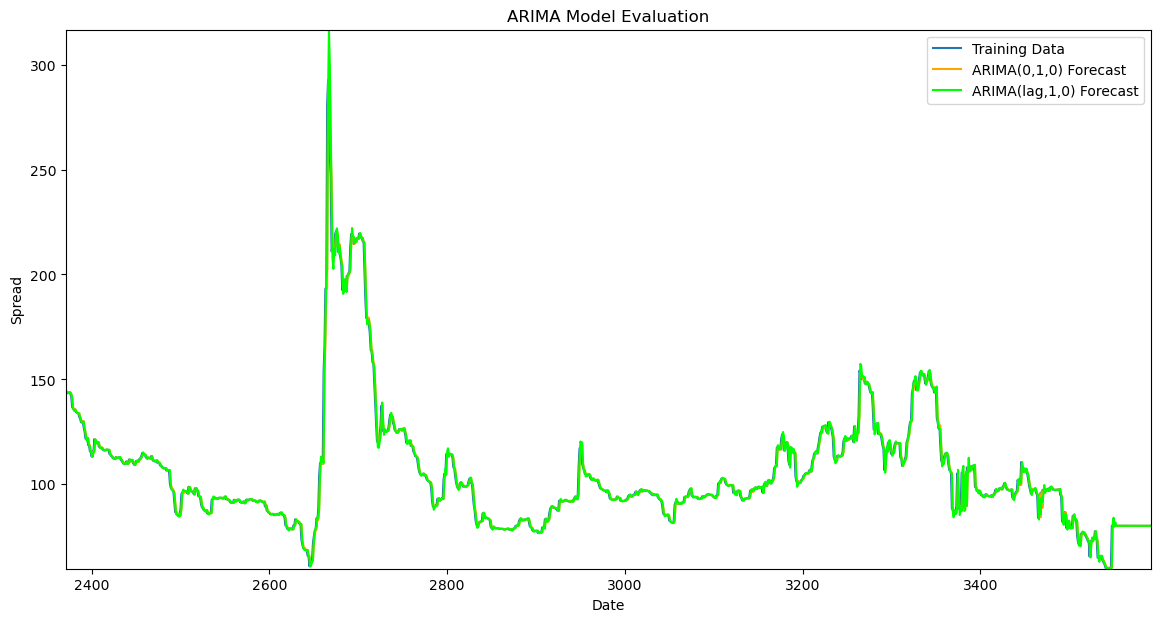


Evaluating column: India_124
India_124 ARIMA(0,1,0) Metrics:
RMSE: 1.1934, MAE: 0.5327, MAPE: 1.2668
India_124 ARIMA(3,1,0) Metrics:
RMSE: 1.2116, MAE: 0.5482, MAPE: 1.3037
Better model for India_124: ARIMA(0,1,0)


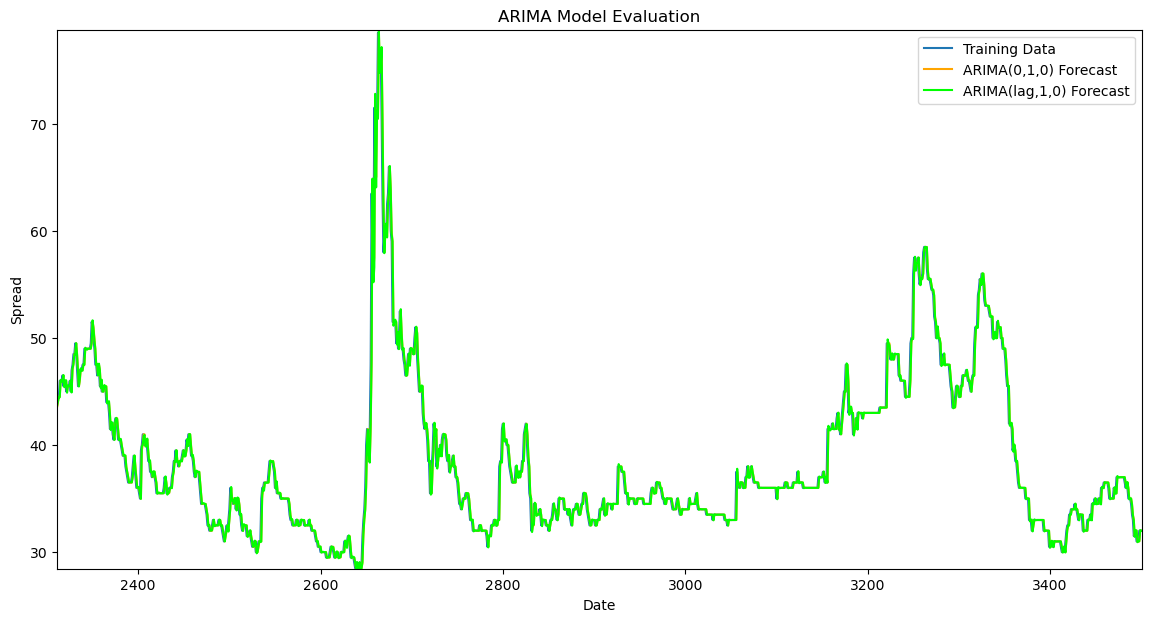


Evaluating column: India_136
India_136 ARIMA(0,1,0) Metrics:
RMSE: 2.0866, MAE: 0.9515, MAPE: 1.8641
India_136 ARIMA(3,1,0) Metrics:
RMSE: 2.1218, MAE: 0.9947, MAPE: 1.9643
Better model for India_136: ARIMA(0,1,0)


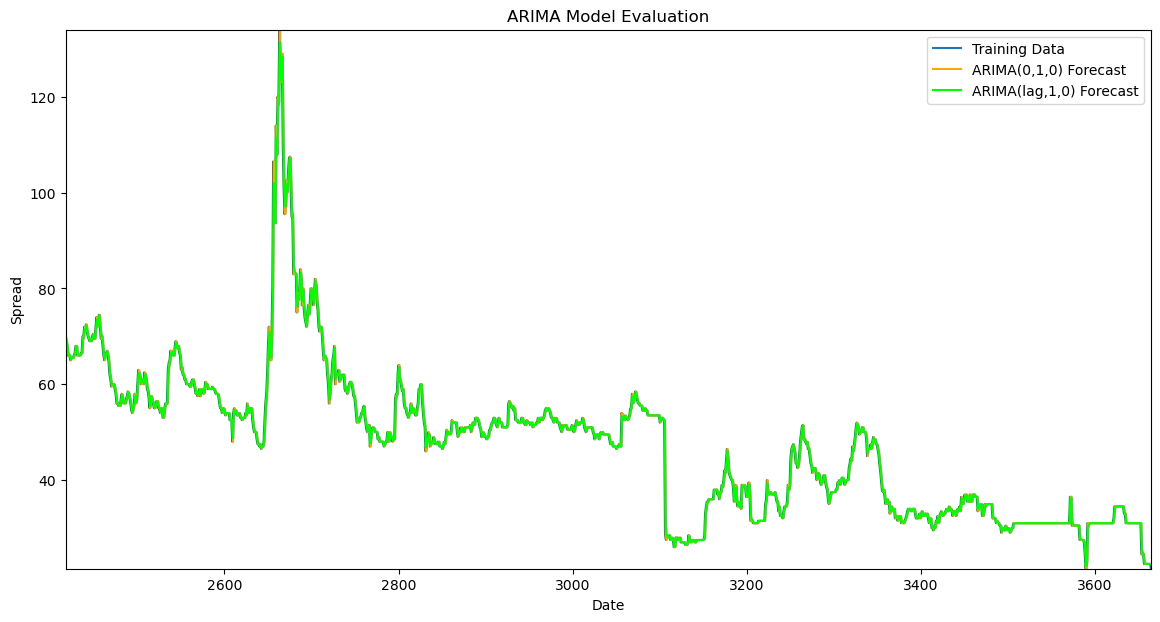


Evaluating column: India_153
India_153 ARIMA(0,1,0) Metrics:
RMSE: 3.3818, MAE: 1.2497, MAPE: 1.1077
India_153 ARIMA(6,1,0) Metrics:
RMSE: 3.2927, MAE: 1.3324, MAPE: 1.2173
Better model for India_153: ARIMA(0,1,0)


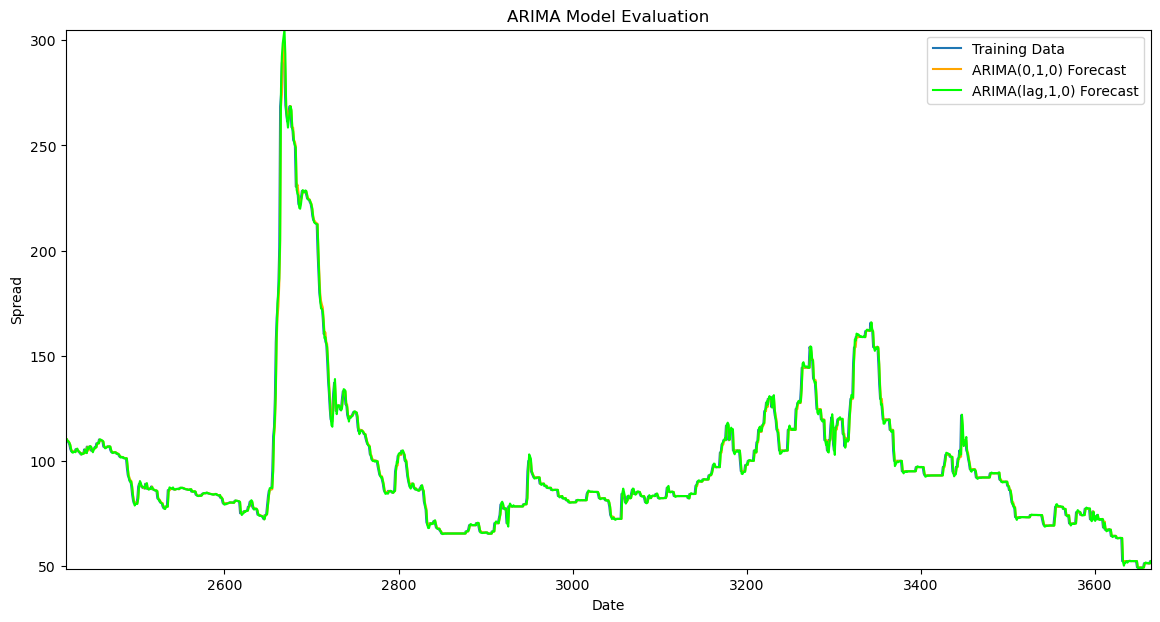


Evaluating column: India_160
India_160 ARIMA(0,1,0) Metrics:
RMSE: 5.6292, MAE: 1.8417, MAPE: 1.5917
India_160 ARIMA(3,1,0) Metrics:
RMSE: 5.6864, MAE: 1.8969, MAPE: 1.6355
Better model for India_160: ARIMA(0,1,0)


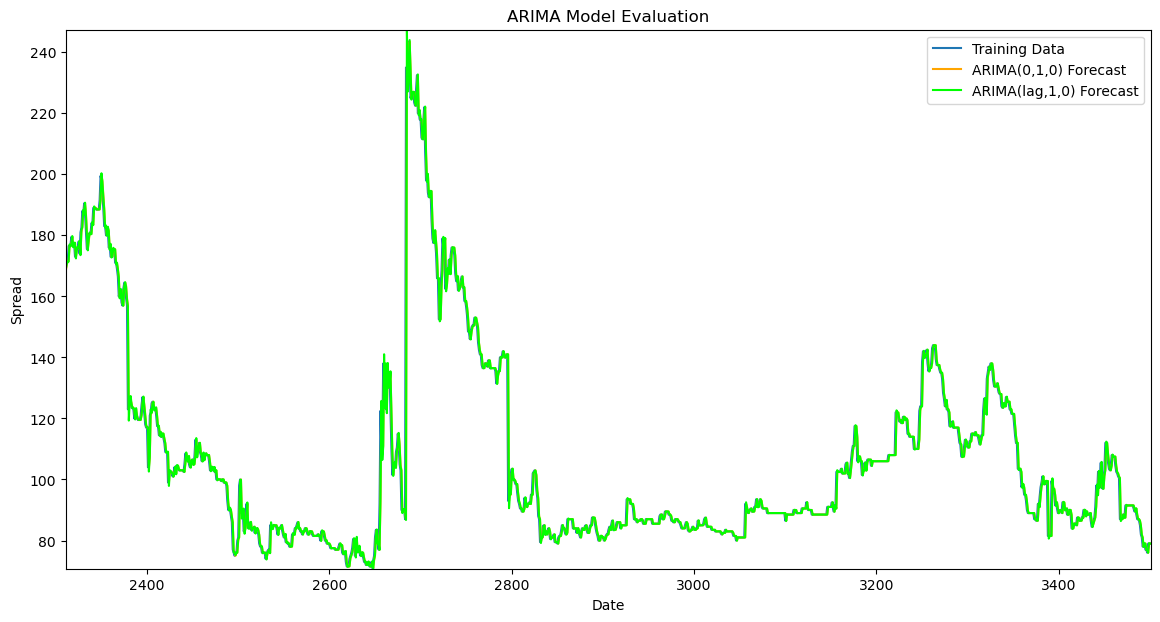


Evaluating column: India_172
India_172 ARIMA(0,1,0) Metrics:
RMSE: 3.4116, MAE: 1.4355, MAPE: 1.2333
India_172 ARIMA(4,1,0) Metrics:
RMSE: 3.2008, MAE: 1.5063, MAPE: 1.3204
Better model for India_172: ARIMA(0,1,0)


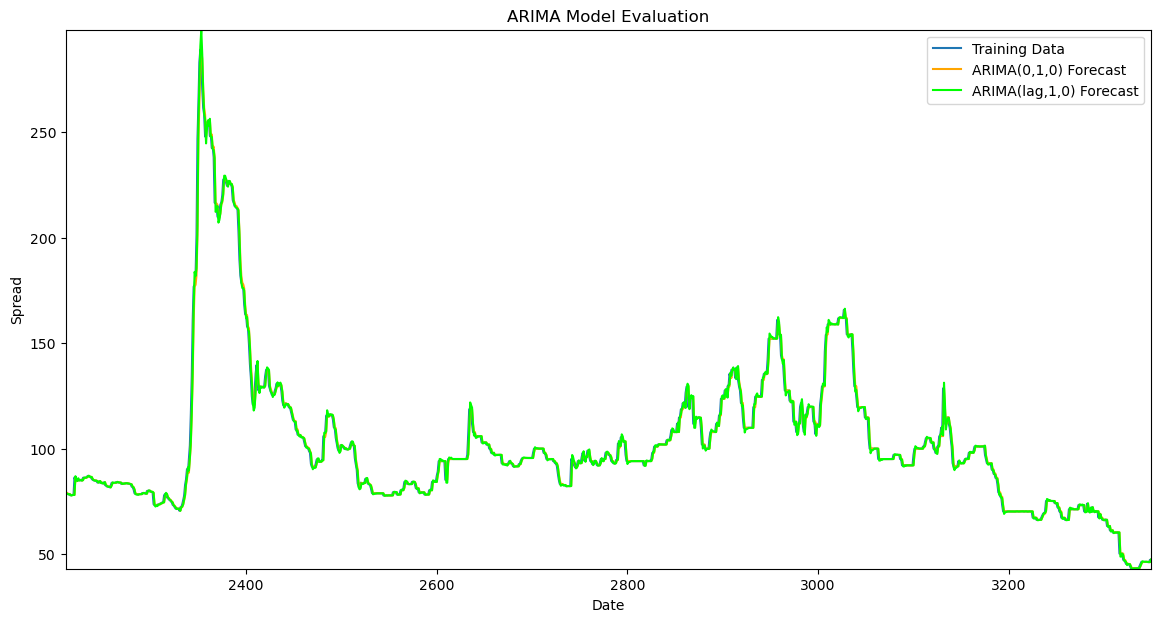


Evaluating column: India_199
India_199 ARIMA(0,1,0) Metrics:
RMSE: 7.7292, MAE: 2.2209, MAPE: 2.0404
India_199 ARIMA(6,1,0) Metrics:
RMSE: 7.8234, MAE: 2.4394, MAPE: 2.2472
Better model for India_199: ARIMA(0,1,0)


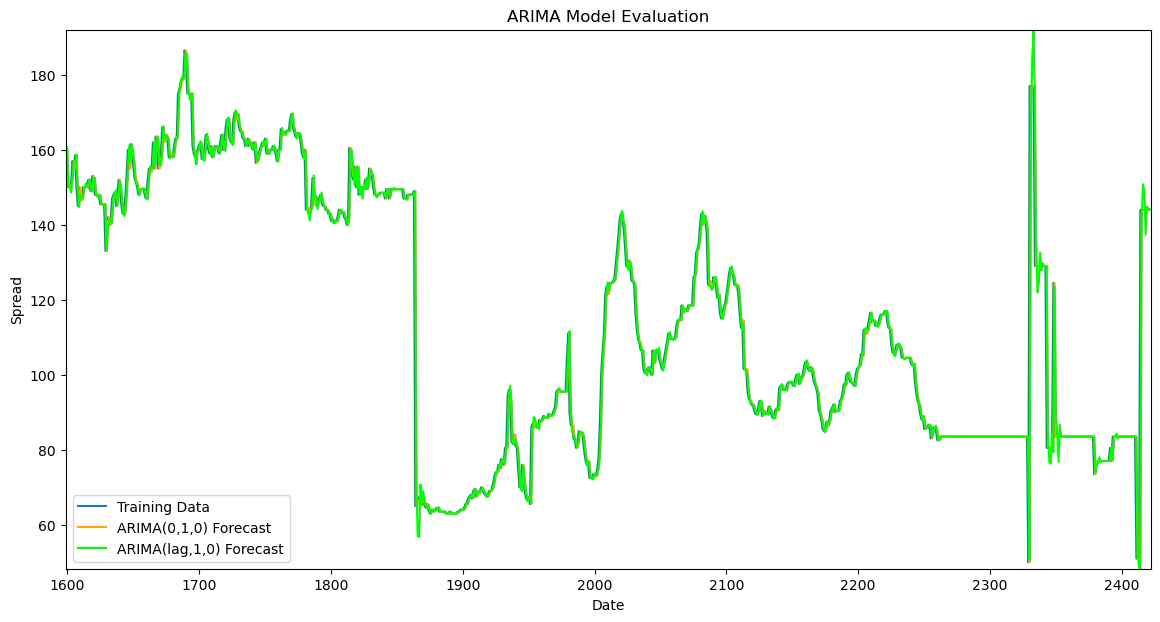


Evaluating column: India_206
India_206 ARIMA(0,1,0) Metrics:
RMSE: 9.6308, MAE: 4.0210, MAPE: 1.2427
India_206 ARIMA(3,1,0) Metrics:
RMSE: 9.6896, MAE: 4.0613, MAPE: 1.2560
Better model for India_206: ARIMA(0,1,0)


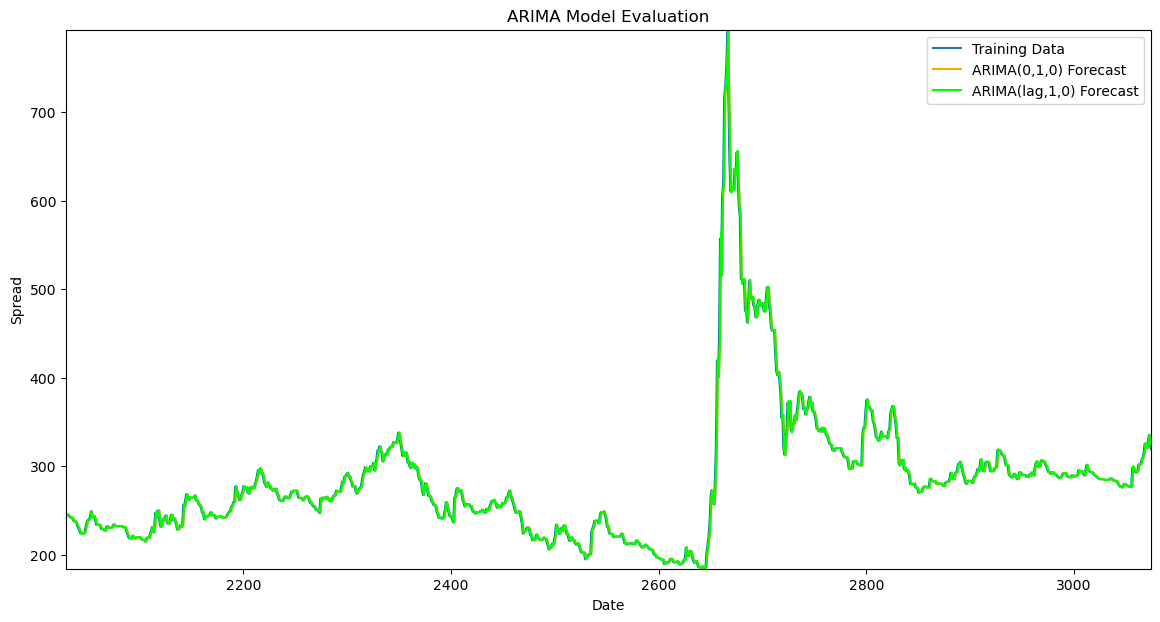


Evaluating column: India_220
India_220 ARIMA(0,1,0) Metrics:
RMSE: 3.6723, MAE: 1.5025, MAPE: 1.1141
India_220 ARIMA(3,1,0) Metrics:
RMSE: 3.6688, MAE: 1.5153, MAPE: 1.1247
Better model for India_220: ARIMA(0,1,0)


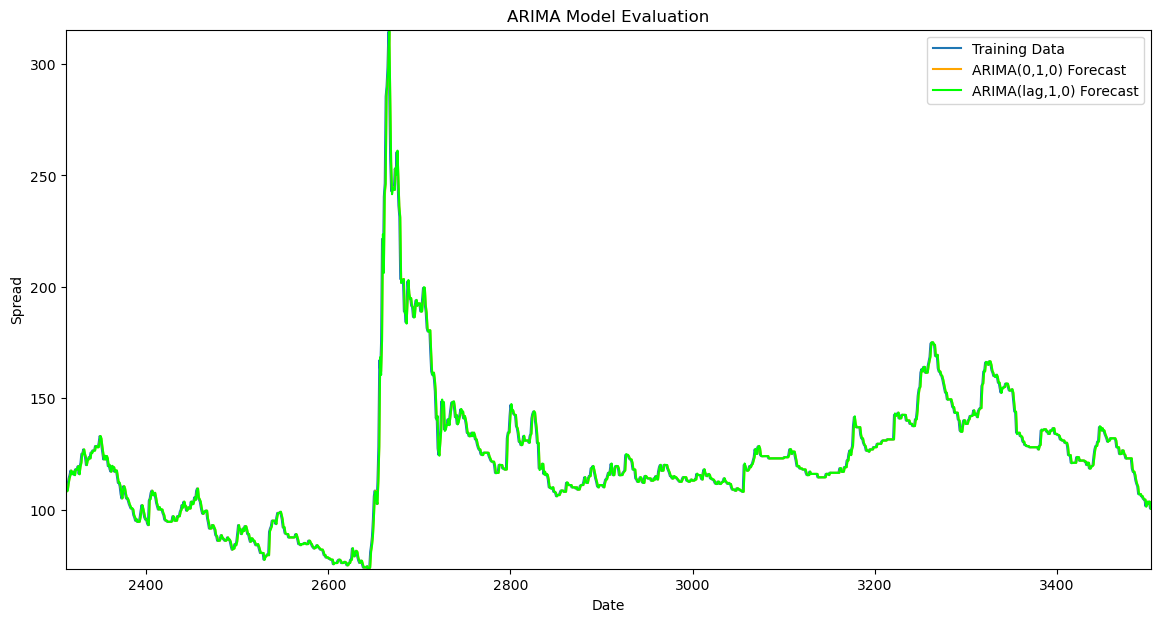

In [3]:
# Function to calculate MAPE
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Dictionaries to store fitted models and forecasts for each column
all_fitted_models = {}
all_forecasts = {}
    
# Create an empty DataFrame to store metrics
metrics_df = []

# Iterate over columns and compare models
for column in df.columns[1:14]:
    if column in chosen_lags:
        print(f"\nEvaluating column: {column}")
        series = df[column]
        column_name = column
        
        # Function to evaluate and compare models
        start_index = series.first_valid_index()
        end_index = series.last_valid_index()
        series = series.loc[start_index:end_index]
        series = series.reset_index(drop=True)
        size = int(len(series) * 0.66)
        train, test = series[0:size], series[size:len(series)]
        history = [x for x in train]
        
        
        rw_predictions = list()
        arima_predictions = list()
        test_data = list(test)

        # Walk-forward validation
        for t in range(len(test)):
            # Evaluate ARIMA(0,1,0) model
            rw_model = ARIMA(history, order=(0, 1, 0))
            rw_model_fit = rw_model.fit()
            rw_output = rw_model_fit.forecast()
            rw_yhat = rw_output[0]
            rw_predictions.append(rw_yhat)

            # Evaluate ARIMA(x,1,0) model
            lag = chosen_lags.get(column_name, 1)  # Default lag is 1 if not found in dictionary
            arima_model = ARIMA(history, order=(lag, 1, 0))
            arima_model_fit = arima_model.fit()
            arima_output = arima_model_fit.forecast()
            arima_yhat = arima_output[0]
            arima_predictions.append(arima_yhat)

            obs = test[t+len(train)]
            history.append(obs)
    
        # Evaluate forecasts
        rw_rmse = sqrt(mean_squared_error(test, rw_predictions))
        arima_rmse = sqrt(mean_squared_error(test, arima_predictions))
        rw_mae = mean_absolute_error(test, rw_predictions)
        arima_mae = mean_absolute_error(test, arima_predictions)
        rw_mape = mape(test, rw_predictions)
        arima_mape = mape(test, arima_predictions)

        # Inside the compare_models function, after calculating metrics
        metrics_df.append({
            'Column': column_name,
            'Model': 'ARIMA(0,1,0)',
            'RMSE': rw_rmse,
            'MAE': rw_mae,
            'MAPE': rw_mape
        })

        metrics_df.append({
            'Column': column_name,
            'Model': f'ARIMA({lag},1,0)',
            'RMSE': arima_rmse,
            'MAE': arima_mae,
            'MAPE': arima_mape
        })
        

        # Compare models
        
        # Compare models based on all metrics
        rw_better_count = 0
        arima_better_count = 0
        
        if rw_rmse < arima_rmse:
            rw_better_count += 1
        else:
            arima_better_count += 1

        if rw_mae < arima_mae:
            rw_better_count += 1
        else:
            arima_better_count += 1

        if rw_mape < arima_mape:
            rw_better_count += 1
        else:
            arima_better_count += 1
            
        if rw_better_count > arima_better_count:
            better_model = "ARIMA(0,1,0)"
        elif arima_better_count > rw_better_count:
            better_model = f"ARIMA({lag},1,0)"
        else:
            better_model = "No clear winner"
            
        # Print forecast metrics and the better model
        print(f"{column_name} ARIMA(0,1,0) Metrics:")
        print(f"RMSE: {rw_rmse:.4f}, MAE: {rw_mae:.4f}, MAPE: {rw_mape:.4f}")
        print(f"{column_name} ARIMA({lag},1,0) Metrics:")
        print(f"RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}, MAPE: {arima_mape:.4f}")
        print(f"Better model for {column_name}: {better_model}")
    
        # Store fitted models and forecasts for the current columns
        fitted_models = {'rw_model': rw_model_fit, 'arima_model': arima_model_fit}
        forecasts = {'rw_predictions': rw_predictions, 'arima_predictions': arima_predictions, 'test_data': test_data}
        all_fitted_models[column_name] = fitted_models
        all_forecasts[column_name] = forecasts

        # Create a plot to compare the forecast with the actual test data
        plt.figure(figsize=(14, 7))
        plt.plot(series, label='Training Data')
        # Create Series objects for the predictions
        test_forecast_series_rw = pd.Series(rw_predictions, index=test.index)
        test_forecast_series_arima = pd.Series(arima_predictions, index=test.index)
        # Determine the relevant range for zooming
        x_min, x_max = test.index.min(), test.index.max()
        y_min, y_max = min(test.min(), test_forecast_series_rw.min(), test_forecast_series_arima.min()), max(test.max(), test_forecast_series_rw.max(), test_forecast_series_arima.max())
        # Plot the data
        plt.plot(test_forecast_series_rw, label='ARIMA(0,1,0) Forecast', color='orange')
        plt.plot(test_forecast_series_arima, label='ARIMA(lag,1,0) Forecast', color='lime')
        # Zoom in on the relevant range
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.title('ARIMA Model Evaluation')
        plt.xlabel('Date')
        plt.ylabel('Spread')
        plt.legend()
        plt.show()

In [4]:
metrics_df = pd.DataFrame(metrics_df)

In [5]:
# After the loop over columns

# Create an empty dictionary to store the reshaped data
reshaped_data = {}

# Loop through each column name (series) in all_forecasts
for column_name, forecasts in all_forecasts.items():
    # Unpack the forecasts for the current column
    rw_predictions, arima_predictions, test_data = forecasts['rw_predictions'], forecasts['arima_predictions'], forecasts['test_data']
    # Create a DataFrame for the current column
    column_df = pd.DataFrame({
        'index': range(len(rw_predictions)),
        f'rw_predictions_{column_name}': rw_predictions,
        f'arima_predictions_{column_name}': arima_predictions,
        f'test_data_{column_name}': test_data
    })

    # Append the DataFrame to the reshaped_data dictionary
    for col in column_df.columns:
        reshaped_data[col] = column_df[col]

In [6]:
# Create the final DataFrame with predictions
forecasts_df = pd.DataFrame(reshaped_data)

# Export the DataFrame to an Excel file
forecasts_df.to_excel('all_forecasts_India.xlsx', index=False)

In [7]:
# After the loop over columns
# Export the metrics DataFrame to an Excel file
metrics_df.to_excel('all_metrics_India.xlsx', index=False)

In [8]:
# Export model summaries from all_fitted_models to a Word file
document = docx.Document()
for column_name, models in all_fitted_models.items():
    document.add_heading(f'Column: {column_name}', level=0)
    rw_model_fit = models['rw_model']
    arima_model_fit = models['arima_model']
    lag = chosen_lags.get(column_name, 1)

    document.add_heading('ARIMA(0,1,0) Summary:', level=1)
    document.add_paragraph(str(rw_model_fit.summary()))

    document.add_heading(f'ARIMA({lag},1,0) Summary:', level=1)
    document.add_paragraph(str(arima_model_fit.summary()))

document.save('model_summaries_India.docx')